In [ ]:
#!python3
#!Author:Febriarini Rismawati | Clean and Systematic Syntaxes

This Google Colab Notebook is created as part of the candidacy evaluation for Data Arts Xperience, to fill out Senior Data Scientist role in the company.

The task is to predict Math grade based on other grades listed (Pysics, Science and Statistics).

##Importing

###Libraries

In [ ]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import randn
import warnings
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline

from math import sqrt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Assets/Data.csv')

##Exploratory Data Analysis

In [ ]:
df

,Pysics,Science,Statistics,Math
0,64,67,69,68
1,74,74,63,67
2,60,59,55,57
3,84,88,89,91
4,80,88,78,82
...,...,...,...,...
461,75,91,57,73
462,85,74,74,67
463,65,65,83,85
464,76,91,71,82


Checking Descriptive Statistics

In [ ]:
df.describe()

,Pysics,Science,Statistics,Math
count,466.000000,466.000000,466.000000,466.000000
mean,71.742489,72.813305,73.682403,74.540773
std,16.033238,14.270110,12.180806,11.424528
min,0.000000,0.000000,22.000000,22.000000
25%,66.000000,66.000000,66.250000,67.000000
50%,74.000000,74.000000,74.000000,74.000000
75%,82.000000,83.000000,83.000000,83.000000
max,99.000000,99.000000,100.000000,99.000000


In [ ]:
types = df.dtypes
distinct = df.nunique()
count_na = df.isna().sum()
percent_na = round((df.isna().sum()/len(df))*100, 3)

print('Data Dimension: ', df.shape)

df_check = pd.concat([types, distinct, count_na, percent_na], axis=1)
df_check.reset_index(level=0, inplace=True)
df_check.rename(columns = {'index':'column', 0:'types', 1:'distinct', 2:'count_na', 3: 'percent_na'}, inplace = True)
df_check

Data Dimension:  (466, 4)


,column,types,distinct,count_na,percent_na
0,Pysics,int64,63,0,0.0
1,Science,int64,59,0,0.0
2,Statistics,int64,52,0,0.0
3,Math,int64,49,0,0.0


Since there's no null values there's no need to remove any

Target is Math, while the rest are Features. We are to predict Math grades based on other subjects' grades.

In [ ]:
df.corr()

,Pysics,Science,Statistics,Math
Pysics,1.000000,0.087692,0.075032,0.052502
Science,0.087692,1.000000,0.163366,0.154284
Statistics,0.075032,0.163366,1.000000,0.227062
Math,0.052502,0.154284,0.227062,1.000000


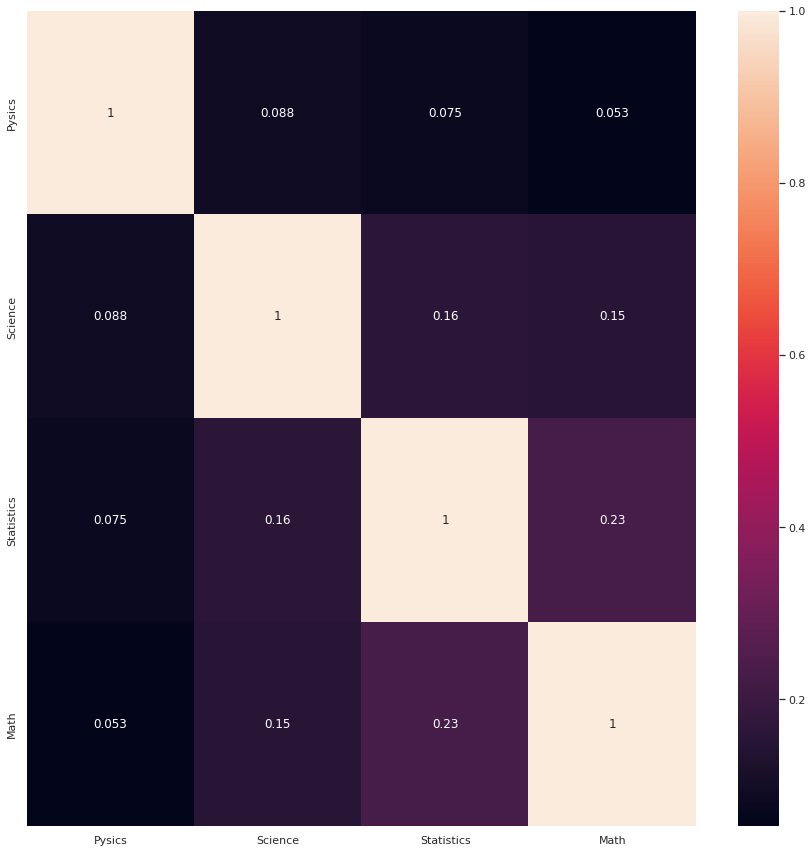

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)
#> <AxesSubplot:>
plt.show()

Extremely Low Correlation to each other

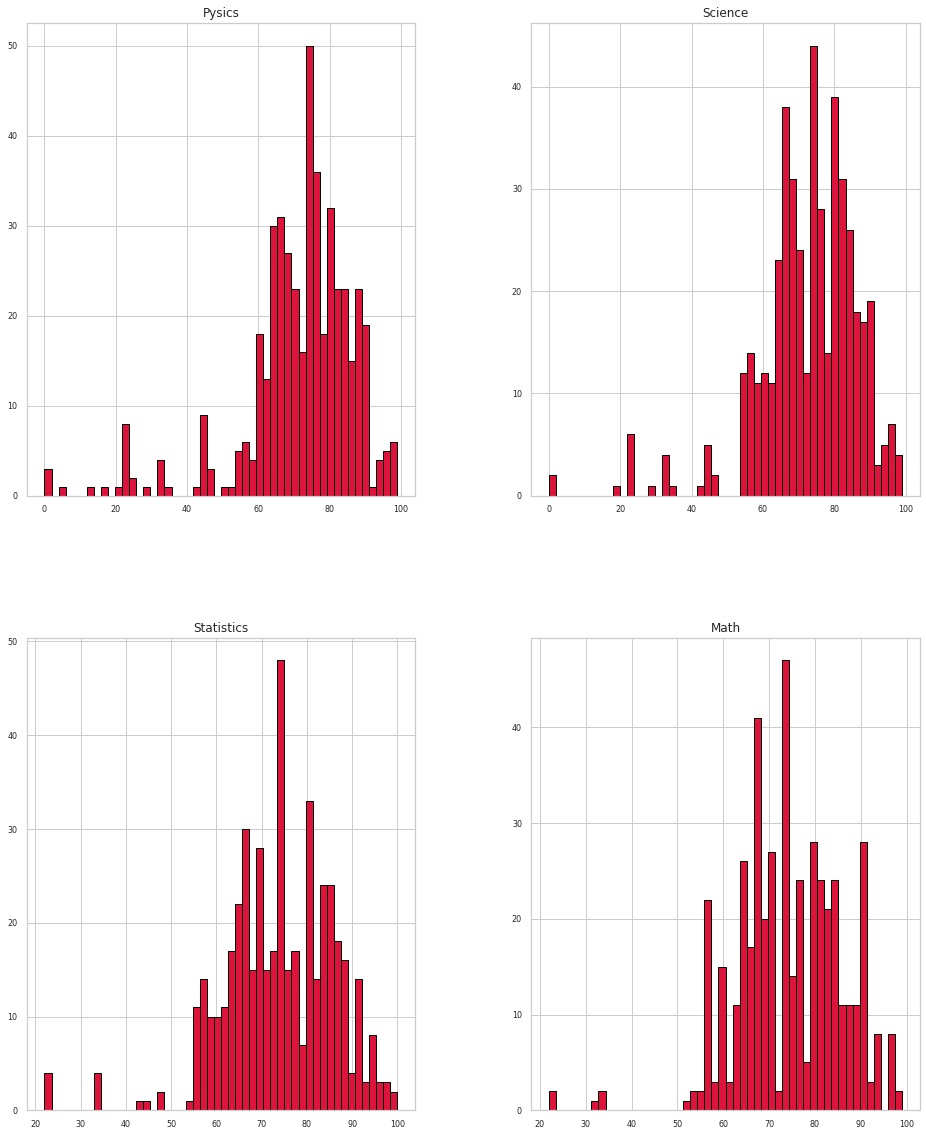

In [ ]:
# Plotting the distribution of all the numerical data
fig_ = df.hist(
    figsize=(16, 20), 
    bins=50, 
    color="crimson", 
    edgecolor="black", 
    xlabelsize=8, 
    ylabelsize=8
)

In [ ]:
# Dividing Target and Features by Each of their quintiles

Math_1 = df[df["Math"] < 20]
Math_2 = df[(df["Math"] >= 20) & (df["Math"] < 40)]
Math_3 = df[(df["Math"] >= 40) & (df["Math"] < 60)]
Math_4 = df[(df["Math"] >= 60) & (df["Math"] < 80)]
Math_5 = df[df["Math"] >= 80]

Pysics_1 = df[df["Pysics"] < 21]
Pysics_2 = df[(df["Pysics"] >= 20) & (df["Pysics"] < 40)]
Pysics_3 = df[(df["Pysics"] >= 40) & (df["Pysics"] < 60)]
Pysics_4 = df[(df["Pysics"] >= 60) & (df["Pysics"] < 80)]
Pysics_5 = df[df["Pysics"] >= 80]

Science_1 = df[df["Science"] < 20]
Science_2 = df[(df["Science"] >= 20) & (df["Science"] < 40)]
Science_3 = df[(df["Science"] >= 40) & (df["Science"] < 60)]
Science_4 = df[(df["Science"] >= 60) & (df["Science"] < 80)]
Science_5 = df[df["Science"] >= 80]

Statistics_1 = df[df["Statistics"] < 20]
Statistics_2 = df[(df["Statistics"] >= 20) & (df["Statistics"] < 40)]
Statistics_3 = df[(df["Statistics"] >= 40) & (df["Statistics"] < 60)]
Statistics_4 = df[(df["Statistics"] >= 60) & (df["Statistics"] < 80)]
Statistics_5 = df[df["Statistics"] >= 80]


In [ ]:
Math_1.fillna({'NaN': 0}, inplace=True)

Statistics_1.fillna({'NaN' : 0}, inplace=True)

Checking some of these categories

In [ ]:
Pysics_5.head()

,Pysics,Science,Statistics,Math
3,84,88,89,91
4,80,88,78,82
9,89,84,80,85
13,80,81,83,74
16,81,89,80,85


In [ ]:
Statistics_3.head()

,Pysics,Science,Statistics,Math
2,60,59,55,57
6,66,59,55,65
17,64,66,59,69
27,60,60,57,52
40,65,66,59,58


In [ ]:
Statistics_2.head()

,Pysics,Science,Statistics,Math
99,44,19,33,83
119,84,80,22,70
120,68,81,33,94
123,97,59,22,89
124,60,80,34,83


In [ ]:
Science_3.head()

,Pysics,Science,Statistics,Math
2,60,59,55,57
6,66,59,55,65
41,64,57,56,57
49,63,56,59,62
75,64,56,57,58


There are inconsistencies when we have a look at these quintiles groups. An A-categorized grade doesn't always confer the fully same category of other grades in the same row. 

A result of this low quality data will be underfitted model. But let's check further

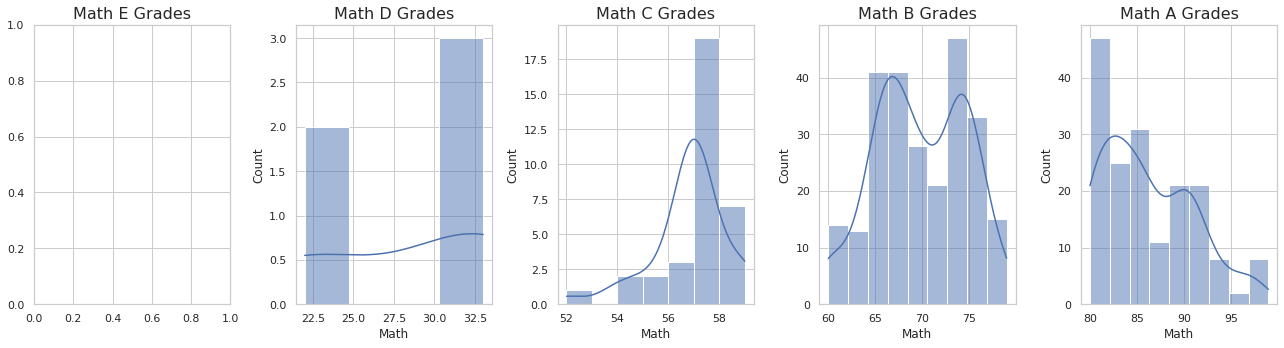

In [ ]:
# histogram plot for each Math group
fig, (bx1, bx2, bx3, bx4, bx5) = plt.subplots(1,5,figsize=(18,5))
sns.histplot(Math_1["Math"], ax = bx1, kde=True)
bx1.set_title("Math E Grades", size=16)
sns.histplot(Math_2["Math"], ax = bx2, kde=True)
bx2.set_title("Math D Grades", size=16)
sns.histplot(Math_3["Math"], ax = bx3, kde=True)
bx3.set_title("Math C Grades", size=16)
sns.histplot(Math_4["Math"], ax = bx4, kde=True)
bx4.set_title("Math B Grades", size=16)
sns.histplot(Math_5["Math"], ax = bx5, kde=True)
bx5.set_title("Math A Grades", size=16)
plt.tight_layout()
plt.show()

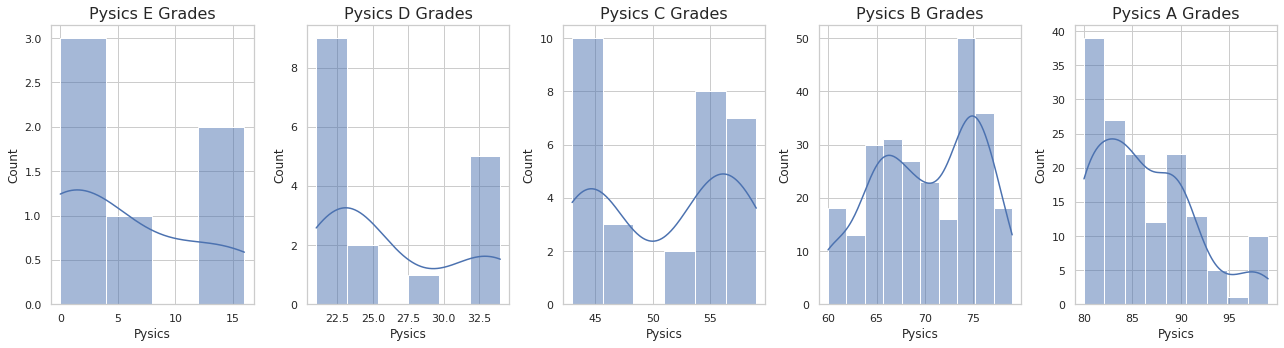

In [ ]:
# histogram plot for each Pysics group
fig, (bx1, bx2, bx3, bx4, bx5) = plt.subplots(1,5,figsize=(18,5))
sns.histplot(Pysics_1["Pysics"], ax = bx1, kde=True)
bx1.set_title("Pysics E Grades", size=16)
sns.histplot(Pysics_2["Pysics"], ax = bx2, kde=True)
bx2.set_title("Pysics D Grades", size=16)
sns.histplot(Pysics_3["Pysics"], ax = bx3, kde=True)
bx3.set_title("Pysics C Grades", size=16)
sns.histplot(Pysics_4["Pysics"], ax = bx4, kde=True)
bx4.set_title("Pysics B Grades", size=16)
sns.histplot(Pysics_5["Pysics"], ax = bx5, kde=True)
bx5.set_title("Pysics A Grades", size=16)
plt.tight_layout()
plt.show()

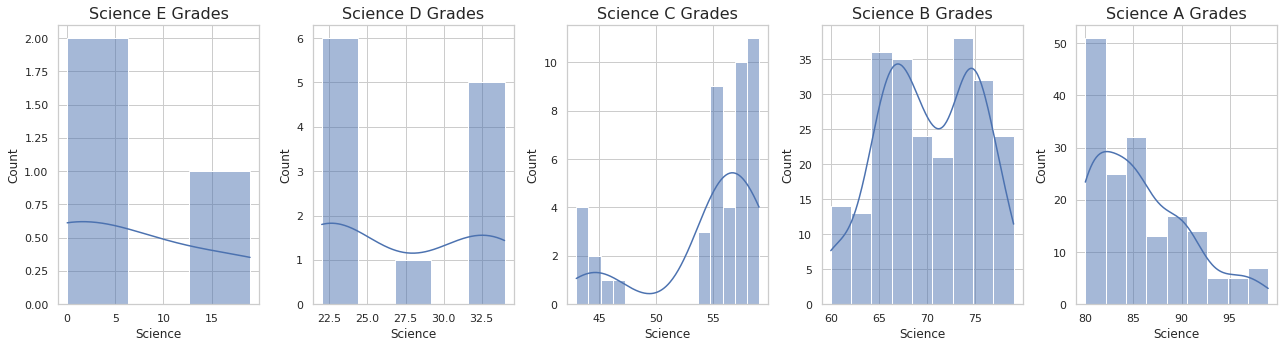

In [ ]:
# histogram plot for each Science group
fig, (bx1, bx2, bx3, bx4, bx5) = plt.subplots(1,5,figsize=(18,5))
sns.histplot(Science_1["Science"], ax = bx1, kde=True)
bx1.set_title("Science E Grades", size=16)
sns.histplot(Science_2["Science"], ax = bx2, kde=True)
bx2.set_title("Science D Grades", size=16)
sns.histplot(Science_3["Science"], ax = bx3, kde=True)
bx3.set_title("Science C Grades", size=16)
sns.histplot(Science_4["Science"], ax = bx4, kde=True)
bx4.set_title("Science B Grades", size=16)
sns.histplot(Science_5["Science"], ax = bx5, kde=True)
bx5.set_title("Science A Grades", size=16)
plt.tight_layout()
plt.show()

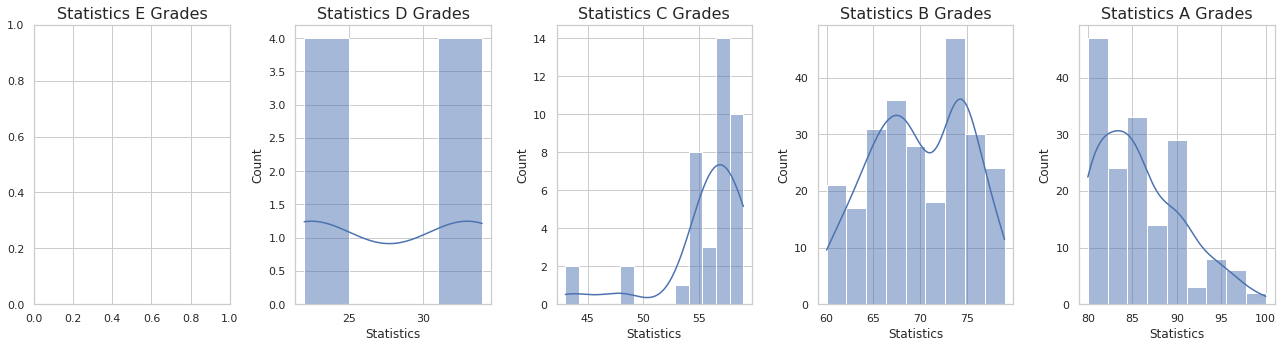

In [ ]:
# histogram plot for each Statistics group
fig, (bx1, bx2, bx3, bx4, bx5) = plt.subplots(1,5,figsize=(18,5))
sns.histplot(Statistics_1["Statistics"], ax = bx1, kde=True)
bx1.set_title("Statistics E Grades", size=16)
sns.histplot(Statistics_2["Statistics"], ax = bx2, kde=True)
bx2.set_title("Statistics D Grades", size=16)
sns.histplot(Statistics_3["Statistics"], ax = bx3, kde=True)
bx3.set_title("Statistics C Grades", size=16)
sns.histplot(Statistics_4["Statistics"], ax = bx4, kde=True)
bx4.set_title("Statistics B Grades", size=16)
sns.histplot(Statistics_5["Statistics"], ax = bx5, kde=True)
bx5.set_title("Statistics A Grades", size=16)
plt.tight_layout()
plt.show()

Checking Joint Plot Between Math and other Subjects

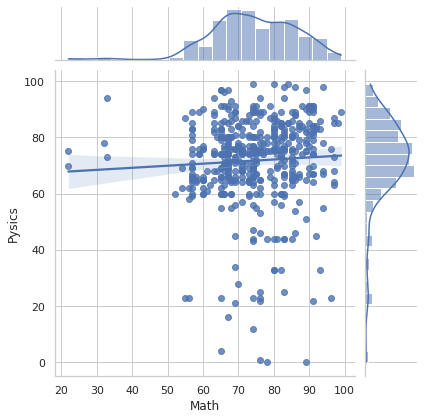

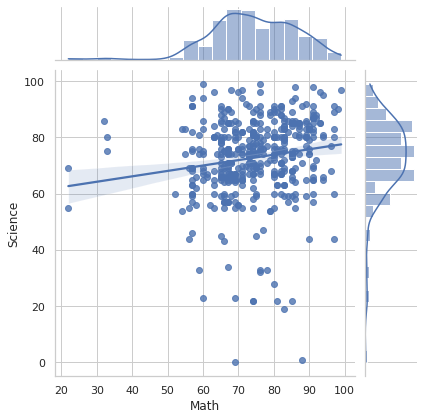

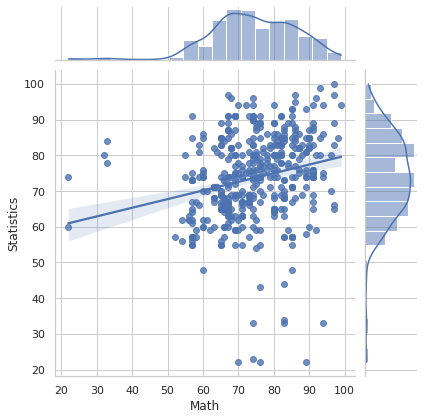

In [ ]:
sns.jointplot(df['Math'], df['Pysics'], kind ="reg")
plt.show()

sns.jointplot(df['Math'], df['Science'], kind ="reg")
plt.show()

sns.jointplot(df['Math'], df['Statistics'], kind ="reg")
plt.show()

Text(0.5, 1.0, 'Plotting Regression Line (Pysics)')

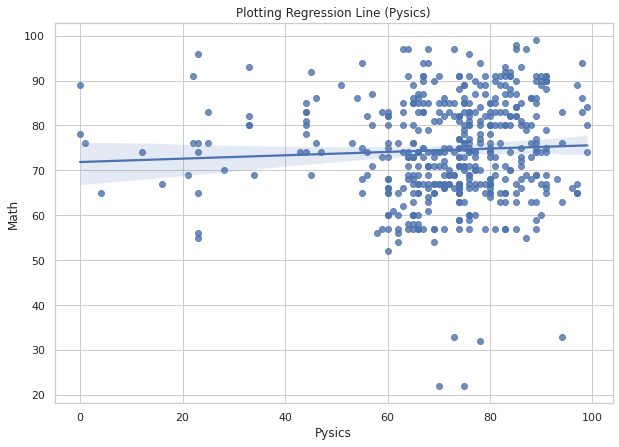

In [ ]:
sns.regplot(x = 'Pysics', y = 'Math', data = df)
plt.title('Plotting Regression Line (Pysics)')

Text(0.5, 1.0, 'Plotting Regression Line (Science))')

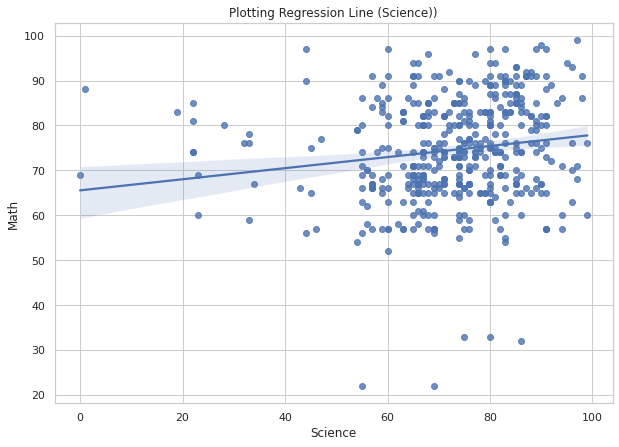

In [ ]:
sns.regplot(x = 'Science', y = 'Math', data = df)
plt.title('Plotting Regression Line (Science))')

Text(0.5, 1.0, 'Plotting Regression Line (Statistics)')

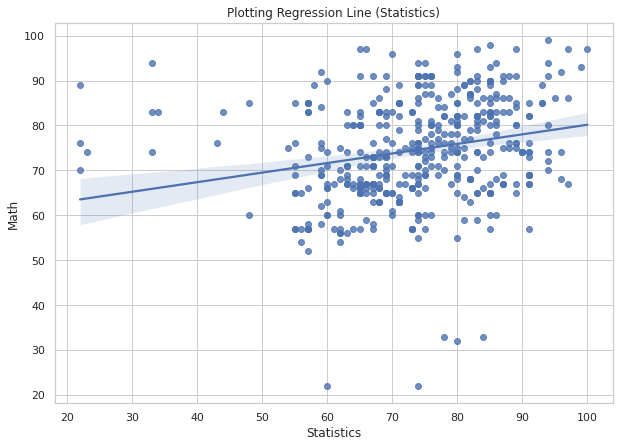

In [ ]:
sns.regplot(x = 'Statistics', y = 'Math', data = df)
plt.title('Plotting Regression Line (Statistics)')

Regression plot shows underfitted model, let's check Multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
X_variables = df[['Pysics','Science','Statistics']]
y_variables = df[['Math']]

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [ ]:
print(vif_data)

      feature        VIF
0      Pysics  17.018630
1     Science  21.899808
2  Statistics  24.479330


Data suffers from very high Multicollinearity

##Training, Testing and Modeling

In [ ]:
target_column = ['Math'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Pysics,Science,Statistics,Math
count,466.000000,466.000000,466.000000,466.000000
mean,0.724672,0.735488,0.736824,74.540773
std,0.161952,0.144143,0.121808,11.424528
min,0.000000,0.000000,0.220000,22.000000
25%,0.666667,0.666667,0.662500,67.000000
50%,0.747475,0.747475,0.740000,74.000000
75%,0.828283,0.838384,0.830000,83.000000
max,1.000000,1.000000,1.000000,99.000000


In [ ]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)
print(X_train.shape); print(X_test.shape)

(233, 3)
(233, 3)


###Testing PCR and PLS to handle Multicollinearity

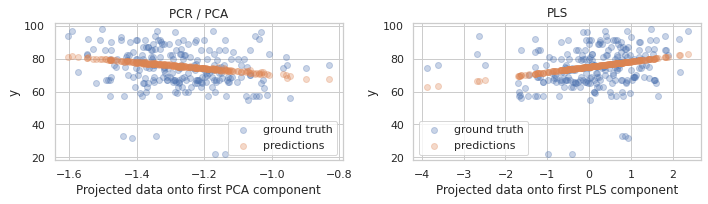

In [ ]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
print(f"PCR R² {pcr.score(X_test, y_test):.3f}")
print(f"PLS R² {pls.score(X_test, y_test):.3f}")

PCR R² 0.027
PLS R² 0.022


In [ ]:
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
print(f"PCR R² with 2 components {pca_2.score(X_test, y_test):.3f}")

PCR R² with 2 components 0.025


Even with Dimensionality Reduction from Principal Component Regression and Partial Least Squares, R² are still too low to be a good explanation of the correlation.

###Defining Function of each Metrics

In [ ]:
# R²
def rsqr_score(test, pred):
    """Calculating R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculating Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R² (test): {rsqr_score(test, pred)}")
    print(f"RMSE (test): {rmse_score(test, pred)}\n")

In [ ]:
# Defining regression models
rr = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Training models on X_train and y_train
for regr in [rr, lasso, elastic, xgboost, lgbm]:
    # fitting the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Printting the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: Ridge
R² (test): 0.025491006580089737
RMSE (test): 12.141357288825416

- Regressor: Lasso
R² (test): 0.017418844610045392
RMSE (test): 12.191538910459707

- Regressor: ElasticNet
R² (test): 0.018917678056931342
RMSE (test): 12.182236849266884

[07:18:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- Regressor: XGBRegressor
R² (test): -0.007399306466874922
RMSE (test): 12.344546431124527

- Regressor: LGBMRegressor
R² (test): -0.01391088765764259
RMSE (test): 12.384378224110717



###Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_train_lr= lr.predict(X_train)
print("- Linear Regression")
print(f"R² (train): {r2_score(y_train, pred_train_lr)}")
print(f"RMSE (train): {np.sqrt(mean_squared_error(y_train,pred_train_lr))}")


pred_test_lr= lr.predict(X_test)
print(f"R² (test): {r2_score(y_test, pred_test_lr)}")
print(f"RMSE (test): {np.sqrt(mean_squared_error(y_test,pred_test_lr))}") 

- Linear Regression
R² (train): 0.1120739251475582
RMSE (train): 9.825024265589152
R² (test): 0.017317874087127594
RMSE (test): 12.19216529863622


The above output shows that the RMSE, one of the two evaluation metrics, is 9 thousand for train data and 12 thousand for test data. On the other hand, R-squared value is 11% for train data and 0.1731 % for test data, which is a bad performance.

###Ridge Regression

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("- Ridge")
print(f"R² (train): {r2_score(y_train, pred_train_rr)}")
print(f"RMSE (train): {np.sqrt(mean_squared_error(y_train,pred_train_rr))}")

pred_test_rr= rr.predict(X_test)
print(f"R² (test): {r2_score(y_test, pred_test_rr)}")
print(f"RMSE (test): {np.sqrt(mean_squared_error(y_test,pred_test_rr))}") 

- Ridge
R² (train): 0.11207324116583828
RMSE (train): 9.825028049764372
R² (test): 0.017460424635614036
RMSE (test): 12.191280952193434


The above output shows that the RMSE, one of the two evaluation metrics, is 9 thousand for train data and 12 thousand for test data. On the other hand, R-squared value is 11.2% for train data and 0.1746% for test data, which still doesn't improve.

####Hyperparameter Tuned Rigde Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=4, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best hyperparameters: {'alpha': 0.7906043210907702}
Best R² (train): 0.07153120384295658


In [ ]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Fit the model on train set
ridge_mod.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_mod.predict(X_test)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R² (test): {rsqr_score(y_test, y_pred)}")
print(f"RMSE (test): {rmse_score(y_test, y_pred)}")

- Ridge
R² (test): 0.02452458984252537
RMSE (test): 12.14737606514122


###Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train) 
pred_train_lasso= lasso.predict(X_train)
print("- Lasso")
print(f"R² (train): {r2_score(y_train, pred_train_lasso)}")
print(f"RMSE (train): {np.sqrt(mean_squared_error(y_train,pred_train_lasso))}")


pred_test_lasso= lasso.predict(X_test)
print(f"R² (test): {r2_score(y_test, pred_test_lasso)}")
print(f"RMSE (test): {np.sqrt(mean_squared_error(y_test,pred_test_lasso))}") 

- Lasso
R² (train): 0.11197170091626996
RMSE (train): 9.825589811908797
R² (test): 0.018274243332076612
RMSE (test): 12.18623100412096


The above output shows that the RMSE, one of the two evaluation metrics, is 9 thousand for train data and 12 thousand for test data. On the other hand, R-squared value is 11.19% for train data and 0.1827% for test data, which is no better.

####Hyperparameter Tuned Lasso Regression

In [ ]:
# Defining hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=4, n_jobs=-1, verbose=1)

# fitting the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# printing best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best hyperparameters: {'alpha': 0.07543120063354623}
Best R² (train): 0.06860126408492465


In [ ]:
# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fitting the model on train set
lasso_mod.fit(X_train, y_train)

# Predicting on test set
y_pred = lasso_mod.predict(X_test)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R² (test): {rsqr_score(y_test, y_pred)}")
print(f"RMSE (test): {rmse_score(y_test, y_pred)}")

- Lasso
R² (test): 0.021701768394542964
RMSE (test): 12.164939348765483


###Elastic Net Regression

In [ ]:
#Elastic Net
elastic = ElasticNet(alpha = 0.01)
elastic.fit(X_train, y_train) 
pred_train_elastic= elastic.predict(X_train)
print("- ElasticNet")
print(f"R² (train): {r2_score(y_train, pred_train_elastic)}")
print(f"RMSE (train): {np.sqrt(mean_squared_error(y_train,pred_train_elastic))}")


pred_test_elastic= elastic.predict(X_test)
print(f"R² (test): {r2_score(y_test, pred_test_elastic)}")
print(f"RMSE (test): {np.sqrt(mean_squared_error(y_test,pred_test_elastic))}") 

- ElasticNet
R² (train): 0.10620296273982655
RMSE (train): 9.857452254152703
R² (test): 0.02614453342581491
RMSE (test): 12.137285477417029


The above output shows that the RMSE, one of the two evaluation metrics, is 9 thousand for train data and 12 thousand for test data. On the other hand, R-squared value is 10.6% for train data and 0.2614% for test data, which is a bad performance.

Slightly worse.

####Hyperparameter Tuned ElasticNet Regression

In [ ]:
# Defining hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
elastic_cv = GridSearchCV(ElasticNet(), tuned_parameters, cv=4, n_jobs=-1, verbose=1)

# fitting the GridSearch on train set
elastic_cv.fit(X_train, y_train)

# printing best params and the corresponding R²
print(f"Best hyperparameters: {elastic_cv.best_params_}")
print(f"Best R² (train): {elastic_cv.best_score_}")

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best hyperparameters: {'alpha': 0.0071968567300115215}
Best R² (train): 0.07130053587013616


In [ ]:
# ElasticNet Regressor with the best hyperparameters
elastic_mod = ElasticNet(alpha=lasso_cv.best_params_["alpha"])

# Fitting the model onto train set
elastic_mod.fit(X_train, y_train)

# Predicting on test set
y_pred = elastic_mod.predict(X_test)

print(f"- {elastic_mod.__class__.__name__}")
print(f"R² (test): {rsqr_score(y_test, y_pred)}")
print(f"RMSE (test): {rmse_score(y_test, y_pred)}")

- ElasticNet
R² (test): 0.017279885496263914
RMSE (test): 12.192400959126473


##Predicting Math Score

###Using Tuned Ridge Regression

Ridge Regression is best for data with dimensionality issue and it's apparent that thr R² of this Regression resulted as the highest.

In [ ]:
df = df[['Pysics', 'Science', 'Statistics', 'Math']]

X = df.iloc[:, 0:3].values
y = df.iloc[:, -1].values

In [ ]:
ridge_mod.fit(X_train, y_train)

Ridge(alpha=0.7906043210907702)

In [ ]:
y_pred = ridge_mod.predict(X_test)

y_pred

array([[78.28491051],
       [76.22869076],
       [77.70343111],
       [78.20417807],
       [77.39705685],
       [74.87651289],
       [77.00162237],
       [77.34620454],
       [75.41082106],
       [73.26950043],
       [75.60882302],
       [77.81891905],
       [76.5128807 ],
       [80.895261  ],
       [74.31893331],
       [76.25793534],
       [70.85244625],
       [70.06456744],
       [73.09305081],
       [73.32352332],
       [67.3071852 ],
       [75.08411015],
       [77.74111781],
       [75.45271005],
       [77.24450348],
       [72.86631476],
       [73.40895784],
       [74.75791332],
       [74.47211865],
       [74.95488715],
       [77.52278634],
       [78.97176848],
       [76.90233844],
       [79.21643118],
       [73.1343632 ],
       [78.02531132],
       [77.57420096],
       [75.36163243],
       [78.2837609 ],
       [79.31336049],
       [73.61115496],
       [71.93778424],
       [75.63634854],
       [71.65531337],
       [79.15236144],
       [74

In [ ]:
print(ridge_mod.score(X_train, y_train))

0.10916618338023543


Plotting the Model

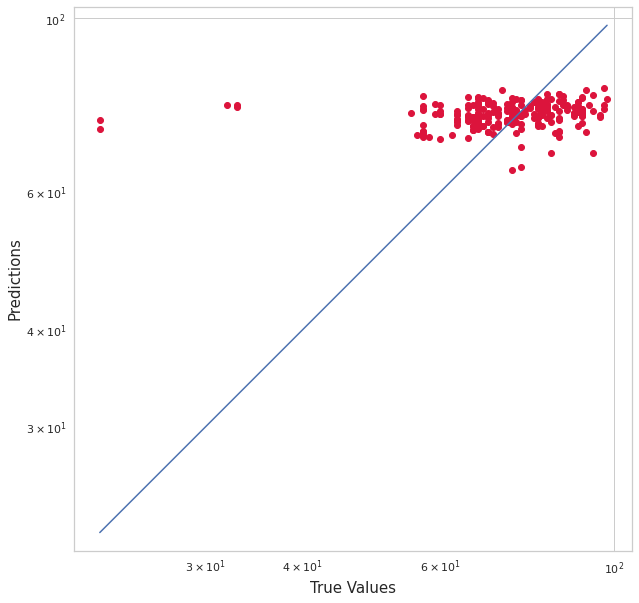

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Looks problematic! The data comes from 400+ students who study these different subjects in 400+ different ways. Some may divide the hours of study evenly on all four resulting in linear grades, but some may encounter situations where they cannot do the same, resulting in deviations. 

Perhaps we should of changed the independent variables. We shall try "Study Hours" for more closely related linear relationship to the dependent variable (Math). 